# 📊 Customer Churn Analysis
Notebook لتحليل بيانات الـ Churn مع استخدام **SMOTE** و **Class Weights**
وتطبيق Random Forest و KNN و Sgd مع تقارير ورسومات شاملة.

## Libraries


In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set(style="whitegrid")


## Load Data


In [46]:

data = pd.read_csv(r'F:\\Ahmed Dahy\\uneeq Interns Task\\1\\customer_churn_dataset-testing-master.csv')
print(data.head())


   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [47]:
vectorizer = TfidfVectorizer(max_features=1000)


## Basic EDA


In [48]:

print(data['Churn'].value_counts())


Churn
0    33881
1    30493
Name: count, dtype: int64


## Drop ID & Encode


In [49]:

data = data.drop('CustomerID', axis=1)
data = pd.get_dummies(data, drop_first=True)
X = data.drop('Churn', axis=1)
y = data['Churn']


## Split


In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())


Churn
0    27088
1    27088
Name: count, dtype: int64


## Apply SMOTE


In [51]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())

Churn
0    27088
1    27088
Name: count, dtype: int64


## Scale


In [52]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Random Forest

In [53]:

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9986019417475728


##  KNN

In [54]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN CV Mean:", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN CV Mean: 0.9048840905811748
KNN Accuracy: 0.9060970873786408


## SGDClassifier

SGD Accuracy: 0.8261747572815534
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      6793
           1       0.79      0.86      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



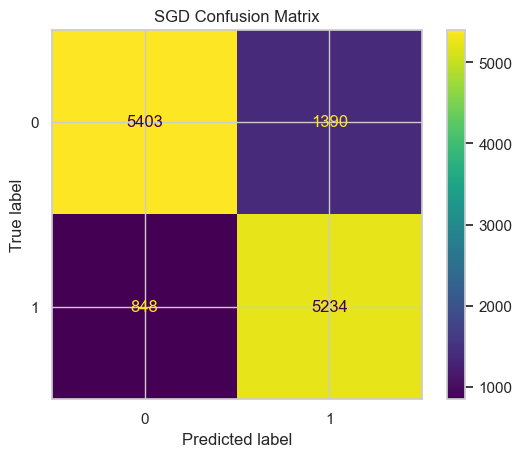

In [55]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge')  # hinge = Linear SVM
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))
ConfusionMatrixDisplay.from_predictions(y_test, sgd_pred)
plt.title('SGD Confusion Matrix')
plt.show()


## Classification Reports

In [56]:

print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))
print("\nKNN Report:\n", classification_report(y_test, knn_pred))
print("\nSGD Report:\n", classification_report(y_test, sgd_pred))



Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875


KNN Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      6793
           1       0.87      0.94      0.90      6082

    accuracy                           0.91     12875
   macro avg       0.91      0.91      0.91     12875
weighted avg       0.91      0.91      0.91     12875


SGD Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      6793
           1       0.79      0.86      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.8

## Confusion Matrices

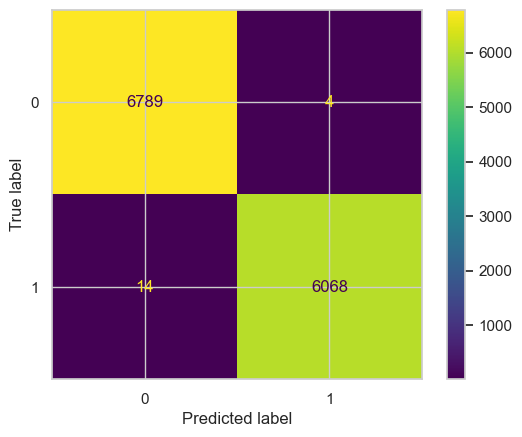

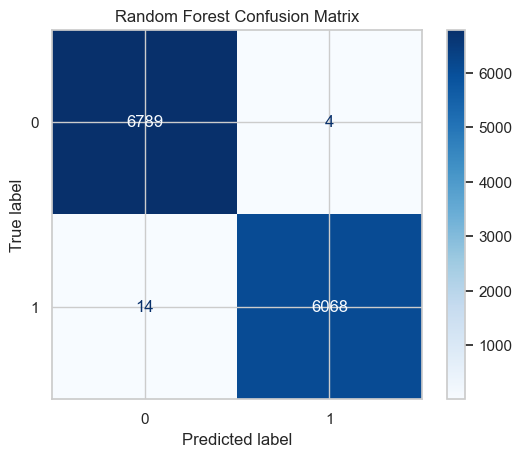

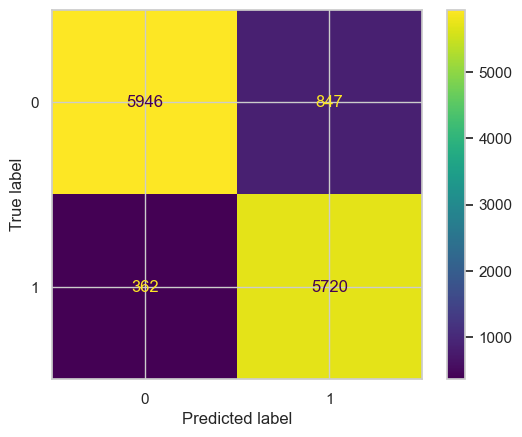

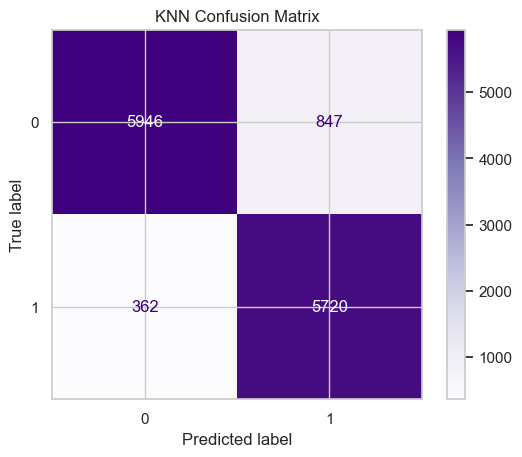

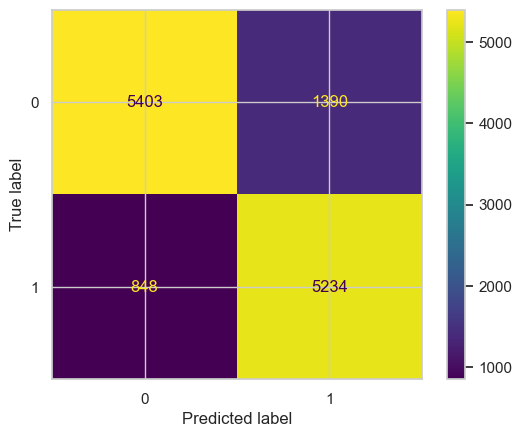

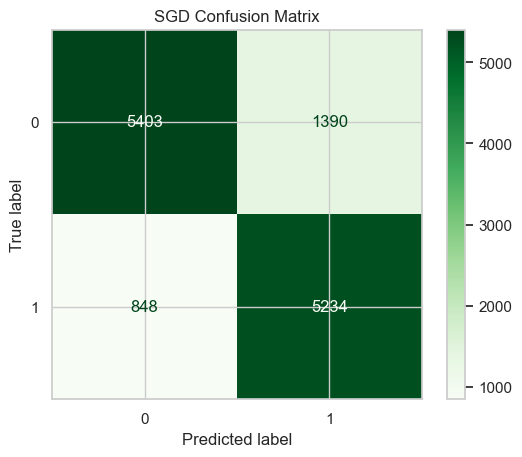

In [57]:

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test).plot(cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_estimator(sgd, X_test, y_test).plot(cmap='Greens')
plt.title('SGD Confusion Matrix')
plt.show()


## ROC & Precision-Recall Curves

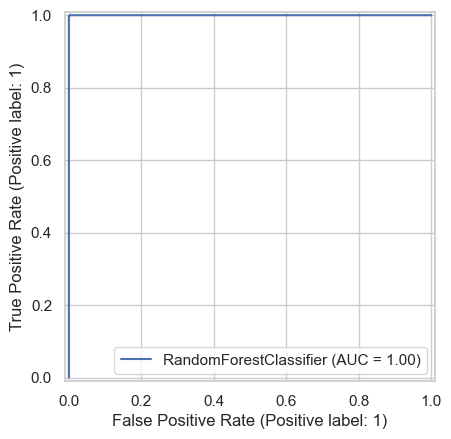

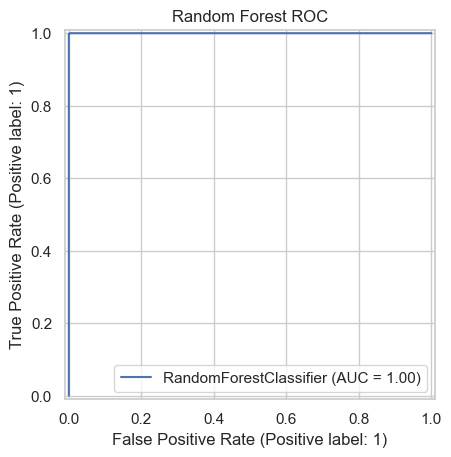

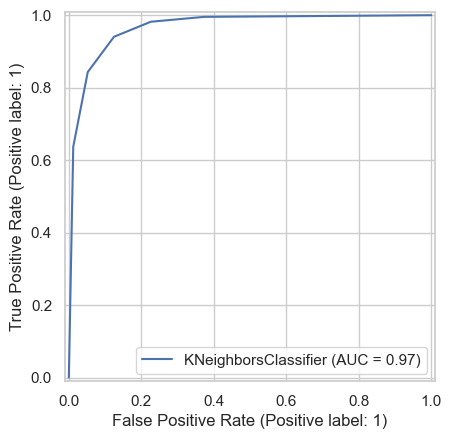

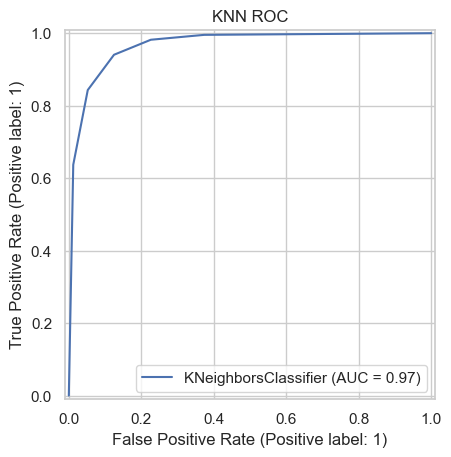

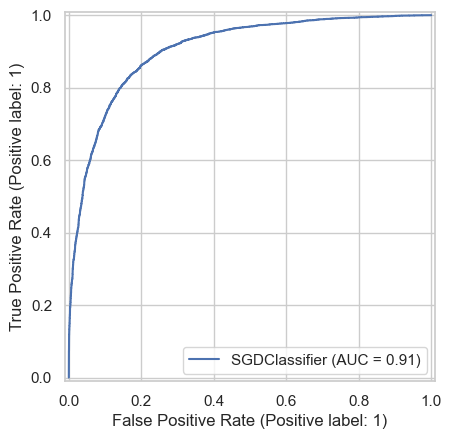

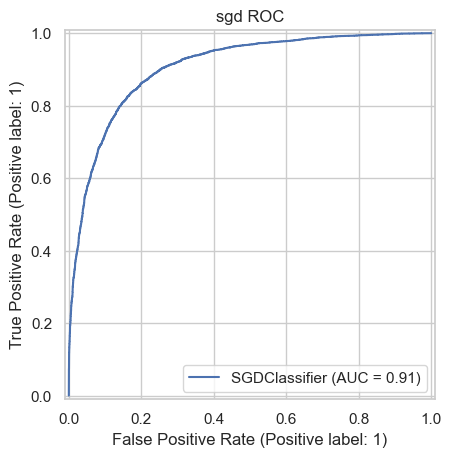

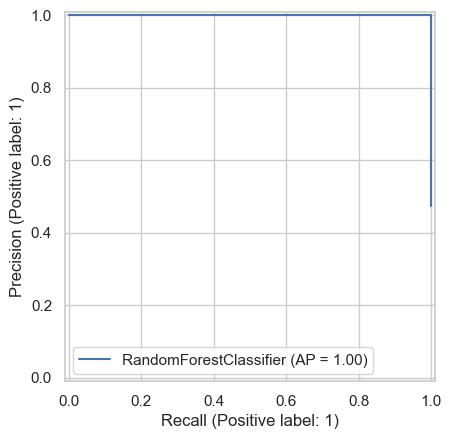

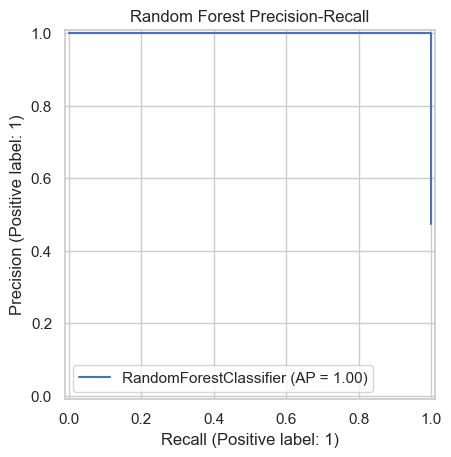

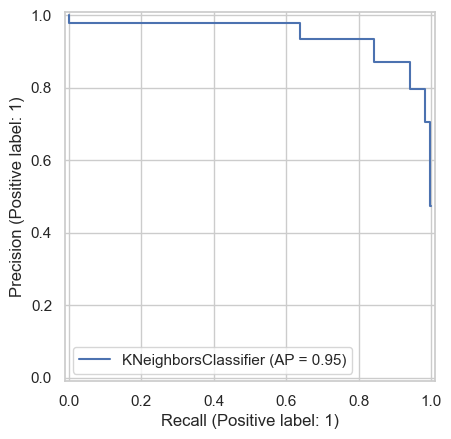

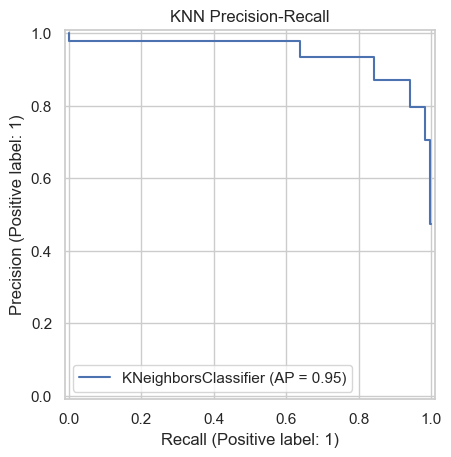

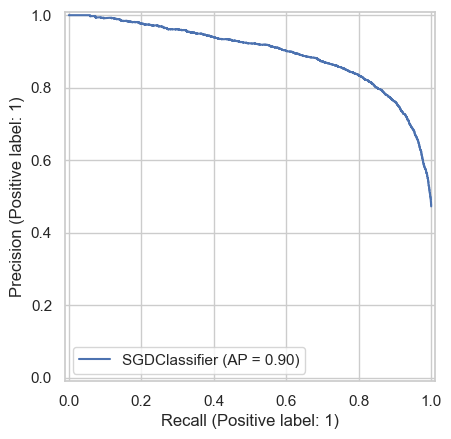

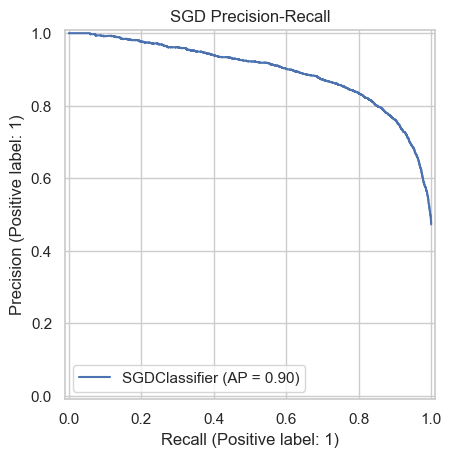

In [44]:

RocCurveDisplay.from_estimator(rf, X_test, y_test).plot()
plt.title('Random Forest ROC')
plt.show()

RocCurveDisplay.from_estimator(knn, X_test, y_test).plot()
plt.title('KNN ROC')
plt.show()

RocCurveDisplay.from_estimator(sgd, X_test, y_test).plot()
plt.title('sgd ROC')
plt.show()

PrecisionRecallDisplay.from_estimator(rf, X_test, y_test).plot()
plt.title('Random Forest Precision-Recall')
plt.show()

PrecisionRecallDisplay.from_estimator(knn, X_test, y_test).plot()
plt.title('KNN Precision-Recall')
plt.show()

PrecisionRecallDisplay.from_estimator(sgd, X_test, y_test).plot()
plt.title('SGD Precision-Recall')
plt.show()
